#### ディープラーニング基礎
- https://zenn.dev/joel/articles/575b7c20aa780c

In [11]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Activation, Dense, Dropout
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras import optimizers
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Test 1

Epoch 1/3


c:\Users\JY810251\python\blow_prediction\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4944 - loss: 1.7248
Epoch 2/3
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8322 - loss: 0.7045
Epoch 3/3
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8755 - loss: 0.4934


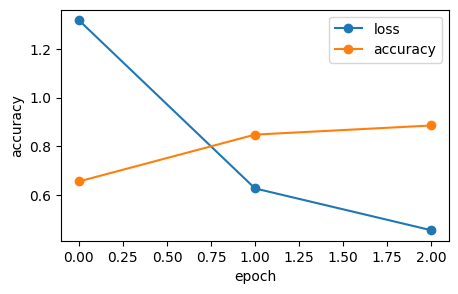

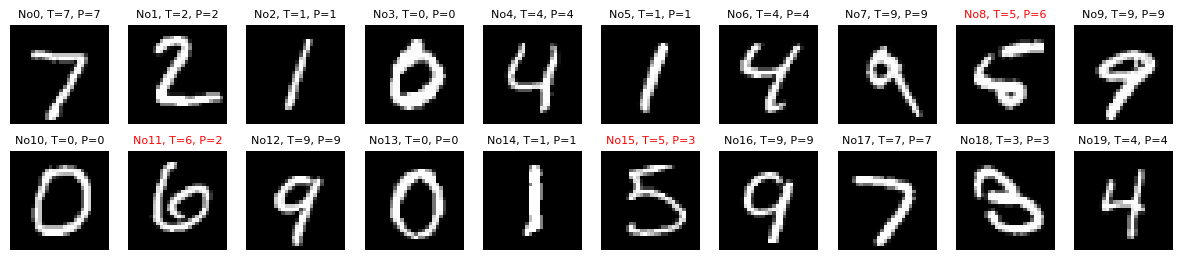

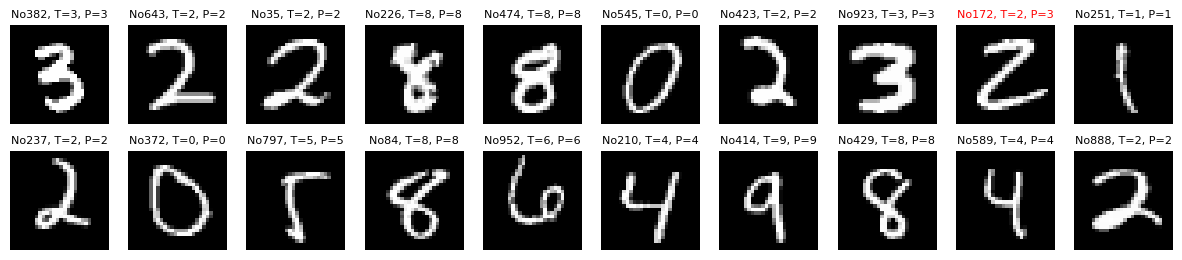

In [9]:
tf.random.set_seed(32)

(x_train, y_train), (x_test, y_test) = mnist.load_data()

shapes = x_train.shape[1] * x_train.shape[2]
x_train = x_train.reshape(x_train.shape[0], shapes)[:6000]
x_test = x_test.reshape(x_test.shape[0], shapes)[:1000]
# y_train = to_categorical(y_train)[:6000]
# y_test = to_categorical(y_test)[:1000]
y_train = y_train[:6000]
y_test = y_test[:1000]

model = Sequential()
model.add(Dense(256, input_dim=784, name='dense_1'))
model.add(Activation('sigmoid', name='sigmoid'))
model.add(Dense(128, name='dense_2'))
model.add(Activation('relu', name='relu'))
model.add(Dense(10, name='dense_3'))
model.add(Activation('softmax', name='softmax'))

# model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# model.summary()

history = model.fit(x_train, y_train, verbose=1, epochs=3)


plt.figure(figsize=(5, 3))
plt.plot(history.history['loss'], label='loss', marker='o')
plt.plot(history.history['accuracy'], label='accuracy', marker='o')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='best')
plt.show()

# 結果処理
pd.options.display.float_format = '{:.05f}'.format
predictions = model.predict(x_test, verbose=0)
df_prob = pd.DataFrame(predictions)
df_prob['prob'] = df_prob.iloc[:, :10].idxmax(axis=1)
df_prob['y_test'] = y_test
# df_prob.head(3)

# 最初の10枚
row, col = 2, 10
fig, axs = plt.subplots(row, col, figsize=(col*1.5, row*1.5))
num = 0
for i in range(row):
    for j in range(col):
        axs[i][j].imshow(x_test[num].reshape((28,28)), "gray")
        pred = df_prob['prob'][num]
        if pred != y_test[num]:
            axs[i][j].set_title(f'No{num}, T={y_test[num]}, P={pred}', color='r', fontsize=8)
        else:
            axs[i][j].set_title(f'No{num}, T={y_test[num]}, P={pred}', fontsize=8)
        axs[i][j].axis('off')
        num += 1
plt.show()

# ランダムに10枚
row, col = 2, 10
fig, axs = plt.subplots(row, col, figsize=(col*1.5, row*1.5))
for i in range(row):
    for j in range(col):
        num = np.random.randint(1000)
        axs[i][j].imshow(x_test[num].reshape((28,28)), "gray")
        pred = df_prob['prob'][num]
        if pred != y_test[num]:
            axs[i][j].set_title(f'No{num}, T={y_test[num]}, P={pred}', color='r', fontsize=8)
        else:
            axs[i][j].set_title(f'No{num}, T={y_test[num]}, P={pred}', fontsize=8)
        axs[i][j].axis('off')
# plt.tight_layout()
plt.show()

# ハイパーパラメータ

In [26]:
tf.random.set_seed(32)

(x_train, y_train), (x_test, y_test) = mnist.load_data()

shapes = x_train.shape[1] * x_train.shape[2]
x_train = x_train.reshape(x_train.shape[0], shapes)[:6000]
x_test = x_test.reshape(x_test.shape[0], shapes)[:1000]
y_train = y_train[:6000]
y_test = y_test[:1000]

model = Sequential()
model.add(Dense(256, input_dim=784))
model.add(Activation("sigmoid"))


def funcA():
    model.add(Dense(128))
    model.add(Activation("sigmoid"))


def funcB():
    model.add(Dense(128))
    model.add(Activation("sigmoid"))
    model.add(Dense(128))
    model.add(Activation("sigmoid"))
    model.add(Dense(128))
    model.add(Activation("sigmoid"))


def funcC():
    model.add(Dense(1568))
    model.add(Activation("sigmoid"))


# funcA()
# funcB()
funcC()


model.add(Dropout(rate=0.5))
model.add(Dense(10))
model.add(Activation("softmax"))


model.compile(
    optimizer="sgd", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)

CSV_FILE_PATH = "tensorflow_test_03.csv"
callbacks = [tf.keras.callbacks.CSVLogger(CSV_FILE_PATH)]

history = model.fit(
    x_train,
    y_train,
    batch_size=32,
    epochs=10,
    verbose=1,
    validation_data=(x_test, y_test),
    callbacks=callbacks,
)

df = pd.read_csv(CSV_FILE_PATH)
df.tail(1)

Epoch 1/10


c:\Users\JY810251\python\blow_prediction\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.0999 - loss: 2.5621 - val_accuracy: 0.0940 - val_loss: 2.3005
Epoch 2/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.1086 - loss: 2.4689 - val_accuracy: 0.1870 - val_loss: 2.2971
Epoch 3/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.0919 - loss: 2.4526 - val_accuracy: 0.1680 - val_loss: 2.2965
Epoch 4/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.1043 - loss: 2.4178 - val_accuracy: 0.1270 - val_loss: 2.2937
Epoch 5/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.1035 - loss: 2.4046 - val_accuracy: 0.1850 - val_loss: 2.2925
Epoch 6/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.0978 - loss: 2.3799 - val_accuracy: 0.2160 - val_loss: 2.2910
Epoch 7/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.1091 - loss: 2.3631 - val_accuracy: 0.1270 - val_loss: 2.2894
Epoch 8/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.1135 - loss: 2.3640 - val_accuracy: 0.1260 - val_

,epoch,accuracy,loss,val_accuracy,val_loss
9,9,0.10300,2.35012,0.12600,2.28587
